# Volume 4: Heat Flow
    Daniel Perkins
    MATH 437
    10/16/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse as sp
from scipy.sparse import linalg as spla
import matplotlib.animation as animation

In [2]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking $J = 6$ subintervals in the $x$ dimension and $M = 10$ subintervals in time.
Plot the approximation at $t=0, t=0.4$, and $t=1$.

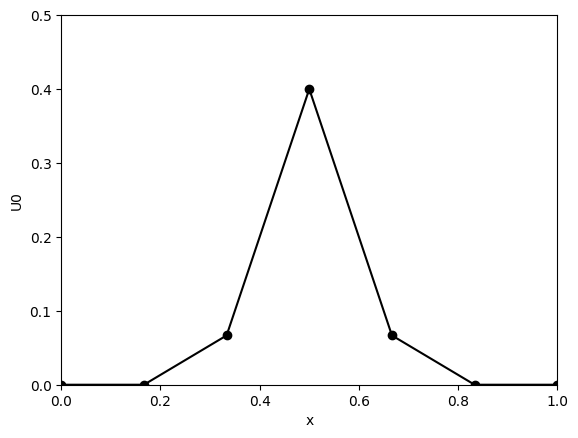

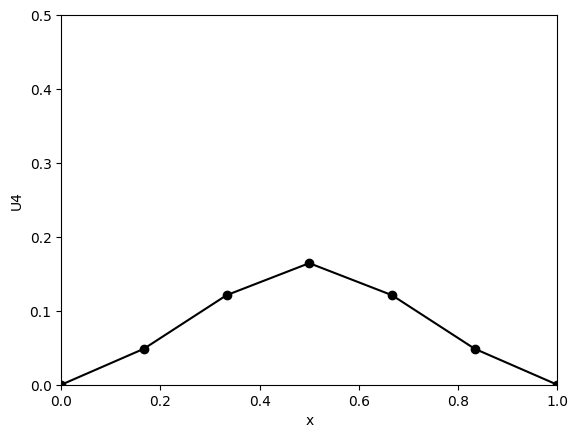

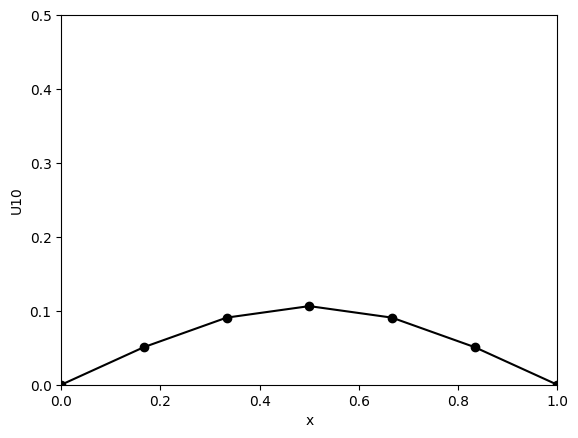

In [29]:
# Set variables
nu = 0.05
a = 0
b = 1
T = 1
J = 6
M = 10
delta_t = (T - 0) / M
delta_x = (b - a) / J
xs = np.linspace(a, b, J+1)
lam = (nu*delta_t)/(delta_x**2)
U = np.array([2*max(0.2 - abs(x - 0.5), 0) for x in xs])

# Define A
left_diagonal = [lam]*(J-1) + [0]
diagonal = [1] + [1-2*lam]*(J-1) + [1]
right_diagonal = [0] + [lam]*(J-1)
A = sp.diags([left_diagonal, diagonal, right_diagonal], offsets=[-1, 0, 1])

# Plot first solution
plt.plot(xs, U, marker='o', color="black")
plt.xlim(0, 1)
plt.ylim(0, .5)
plt.xlabel("x")
plt.ylabel("U0")
plt.show()

# Calculate
for i in range(1, M+1):
    # Plot it
    U = A @ U  # Formula 9.3
    if i == 4 or i == 10:
        plt.plot(xs, U, marker='o', color="black")
        plt.xlim(0, 1)
        plt.ylim(0, .5)
        plt.xlabel("x")
        plt.ylabel(f"U{i}")
        plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

Use $J = 140$ subintervals in the $x$ dimension and $M = 70$ subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant–Friedrichs–Lewy).
The CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


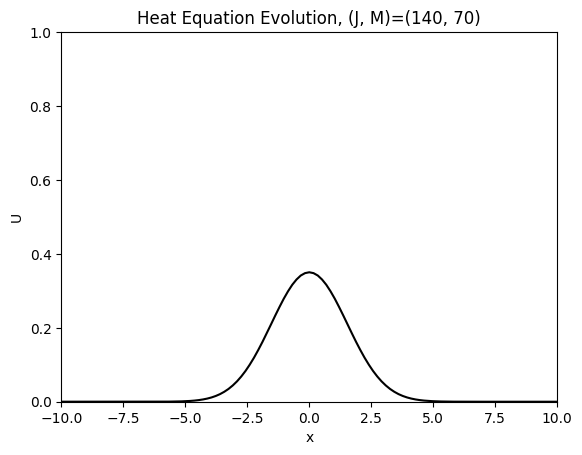

In [58]:
# Set variables
nu = 1
a = -12
b = 12
T = 1
J = 140
M = 70
delta_t = (T - 0) / M
delta_x = (b - a) / J
xs = np.linspace(a, b, J+1)
lam = (nu*delta_t)/(delta_x**2)
U = np.maximum(1 - xs**2, 0)

# Define A
left_diagonal = [lam]*(J-1) + [0]
diagonal = [1] + [1-2*lam]*(J-1) + [1]
right_diagonal = [0] + [lam]*(J-1)
A = sp.diags([left_diagonal, diagonal, right_diagonal], offsets=[-1, 0, 1])

# Set up animation
fig, ax = plt.subplots()
line, = ax.plot(xs, U, color="black")
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel("U")
ax.set_title("Heat Equation Evolution, (J, M)=(140, 70)")

# Update function for the animation
def update(frame):
    global U
    U = A @ U  # Update U at each time step
    line.set_ydata(U)  # Update the y data of the plot
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(M), blit=True, interval=100)
ani.save('heat_equation1.mp4')

<video src="heat_equation1.mp4" controls>

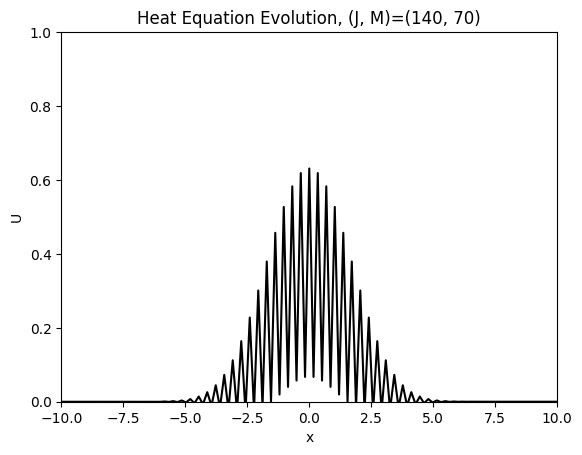

In [59]:
# Set variables
nu = 1
a = -12
b = 12
T = 1
J = 140
M = 66
delta_t = (T - 0) / M
delta_x = (b - a) / J
xs = np.linspace(a, b, J+1)
lam = (nu*delta_t)/(delta_x**2)
U = np.maximum(1 - xs**2, 0)

# Define A
left_diagonal = [lam]*(J-1) + [0]
diagonal = [1] + [1-2*lam]*(J-1) + [1]
right_diagonal = [0] + [lam]*(J-1)
A = sp.diags([left_diagonal, diagonal, right_diagonal], offsets=[-1, 0, 1])

# Set up animation
fig, ax = plt.subplots()
line, = ax.plot(xs, U, color="black")
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel("U")
ax.set_title("Heat Equation Evolution, (J, M)=(140, 70)")

# Update function for the animation
def update(frame):
    global U
    U = A @ U  # Update U at each time step
    line.set_ydata(U)  # Update the y data of the plot
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(M), blit=True, interval=100)
ani.save('heat_equation2.mp4')


<video src="heat_equation2.mp4" controls>

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

In [ ]:
def heat_cn(a, b, alpha, beta, f, nu, T, nx, nt):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
        
        Parameters:
            a - left x boundary (float)
            b - right x boundary (float)
            alpha - left BC (float)
            beta - right BC (float)
            f - initial position (function)
            nu - heat diffusion coefficient (float)
            T - final time (float)
            nx - number of x steps (int)
            nt - number of time steps (int)
            
        Returns:
            U - approximate solution (ndarray(nt,nx))
            x - position array (ndarray(nx,))
    """
    pass